# Data preparation

## Data Preview

In [1]:
# get required packages
import pandas as pd
import numpy as np
import json
import gzip
from IPython.display import display
from PIL import Image
import requests
from io import BytesIO


In [2]:
# folder path to meta dataset
fp_meta = r"AMAZON_FASHION_5core_meta.json.gz"      # 5-core metadata
fp_review = r"reviews_AMAZON_FASHION.csv.gz"        # reviews data
fp_test = r"meta_AMAZON_FASHION.json"            # original metadata (IGNORE THIS)


# functions to read json file and convert into pandas dataframe
def parse_gz_jsonl(path):
    with gzip.open(path, "rt", encoding="utf-8") as f:
        for line in f:
            yield json.loads(line.strip())

def getDF_jsonl_gz(path):
    data_list = list(parse_gz_jsonl(path))
    return pd.DataFrame(data_list)


df_5core = getDF_jsonl_gz(fp_meta)             # 5-core metadata
df_review = pd.read_csv(fp_review)              # reviews data
df_meta = pd.read_json(fp_test, lines=True)    # original metadata


In [3]:
# preview the 5core fashion dataframe
df_5core

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
1,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Black (3746...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
2,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
3,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue (37867...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
4,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3171,5.0,True,"07 2, 2018",A2077NII5H62R2,B005AGO4LU,"{'Size:': ' 8.5 B(M) US', 'Color:': ' Green Gl...",Amazon Customer,Perfect fit!,Five Stars,1530489600,NaN,NaN
3172,5.0,True,"06 28, 2018",A2IBS6PIPAGAB5,B005AGO4LU,"{'Size:': ' 5 B(M) US', 'Color:': ' Wolf Grey/...",J. Avila,My favorite cross trainers!,Comfortable,1530144000,NaN,NaN
3173,5.0,True,"06 25, 2018",A1GTC5EVSJNCQ8,B005AGO4LU,"{'Size:': ' 8 B(M) US', 'Color:': ' Blue Tint/...",Amazon Customer,Love them fit perfect,Five Stars,1529884800,NaN,NaN
3174,5.0,True,"06 20, 2018",A311XHHLM12MUT,B005AGO4LU,"{'Size:': ' 9 B(M) US', 'Color:': ' Blue Tint/...",Peter,Favorite Nike shoe ever! The flex sole is exce...,Love them!,1529452800,NaN,NaN


In [4]:
# preview the original fashion dataframe
df_meta

,title,brand,feature,rank,date,asin,imageURL,imageURLHighRes,description,price,also_view,also_buy,fit,details,similar_item,tech1
0,Slime Time Fall Fest [With CDROM and Collector...,Group Publishing (CO),[Product Dimensions:\n \n8....,"13,052,976inClothing,Shoesamp;Jewelry(",8.70 inches,0764443682,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,XCC Qi promise new spider snake preparing men'...,NaN,NaN,"11,654,581inClothing,Shoesamp;Jewelry(",5 star,1291691480,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Magical Things I Really Do Do Too!,Christopher Manos,[Package Dimensions:\n \n8....,"19,308,073inClothing,ShoesJewelry(",5 star,1940280001,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[For the professional or amateur magician. Ro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Ashes to Ashes, Oranges to Oranges",Flickerlamp Publishing,[Package Dimensions:\n \n8....,"19,734,184inClothing,ShoesJewelry(",5 star,1940735033,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aether & Empire #1 - 2016 First Printing Comic...,NaN,[Package Dimensions:\n \n10...,"10,558,646inClothing,Shoesamp;Jewelry(",5 star,1940967805,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,$4.50,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186632,JT Women's Elegant Off Shoulder Chiffon Maxi L...,JT,NaN,"9,835,890inClothing,ShoesJewelry(",5 star,B01HJGXL4O,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186633,Microcosm Retro Vintage Black Crochet Lace One...,Microcosm,[Package Dimensions:\n \n7....,"11,390,771inClothing,ShoesJewelry(",5 star5 star (0%),B01HJHF97K,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186634,Lookatool Classic Plain Vintage Army Military ...,Lookatool,"[Cotton+Polyester, Imported, Item type:Basebal...","972,275inClothing,ShoesJewelry(",5 star,B01HJGJ9LS,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,$8.53,"[B00XLECZMS, B0018MQAOY, B00N833I4Q, B074DQSPP...","[B07BHQ1FXL, B00XLECZMS, B07CJWM5WY, B07CS97C1...","class=""a-normal a-align-center a-spacing-smal...",NaN,NaN,NaN
186635,Edith Windsor Women's Deep V-neck Beaded Sequi...,Edith Windsor,[Product Dimensions:\n \n9....,"1,964,585inClothing,ShoesJewelry(",5 star,B01HJHTH5U,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,[B077ZLGMJ3],NaN,NaN,NaN,NaN


In [5]:
# col names for original metadata
headers = list(df_meta.columns)
print(headers)

# col names for 5-core metadata
headers = list(df_5core.columns)
print(headers)

['title', 'brand', 'feature', 'rank', 'date', 'asin', 'imageURL', 'imageURLHighRes', 'description', 'price', 'also_view', 'also_buy', 'fit', 'details', 'similar_item', 'tech1']
['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote', 'image']


### Checking for duplicates

In [6]:
# check for duplicates in original metadata
nrows = len(df_meta['asin'].unique())
print(f"There are {nrows} unique 'asin' in test dataframe")
print(f"There are {df_meta.shape[0]} total rows in test dataframe")

if nrows == df_meta.shape[0]:
    print("No duplicates product IDs")
else:
    print("Duplicates of product IDs exist")

print("")

# check for duplicates in 5-core metadata
nrows = len(df_5core['asin'].unique())
print(f"There are {nrows} unique 'asin' in 5core dataframe")
print(f"There are {df_5core.shape[0]} total rows in 5core dataframe")

if nrows == df_5core.shape[0]:
    print("No duplicates product IDs in 5core")
else:
    print("Duplicates of product IDs exist in 5core")

There are 186194 unique 'asin' in test dataframe
There are 186637 total rows in test dataframe
Duplicates of product IDs exist

There are 31 unique 'asin' in 5core dataframe
There are 3176 total rows in 5core dataframe
Duplicates of product IDs exist in 5core


## Creating new tables

### catalogue table

In [7]:
# Drop useless cols
catalogue = df_meta.drop(df_meta.columns[9:], axis=1)
catalogue = catalogue.drop(columns=['rank', 'date', 'imageURL'])
# Drop rows with duplicate 'asin' values, keeping only the first occurrence
catalogue = catalogue.drop_duplicates(subset='asin', keep='first')

In [8]:
# Dimension of catalogue: 186194 rows and 8 columns
print(catalogue.shape)
# Check Null values in imageURLHighRes column: 54385 null values
null_count = catalogue['imageURLHighRes'].isnull().sum()
print(null_count)
# Drop rows where 'imageURLHighRes' is null
catalogue = catalogue.dropna(subset=['imageURLHighRes'])

(186194, 6)
54385


In [9]:
# preview catalogue
catalogue

,title,brand,feature,asin,imageURLHighRes,description
0,Slime Time Fall Fest [With CDROM and Collector...,Group Publishing (CO),[Product Dimensions:\n \n8....,0764443682,[https://images-na.ssl-images-amazon.com/image...,NaN
1,XCC Qi promise new spider snake preparing men'...,NaN,NaN,1291691480,[https://images-na.ssl-images-amazon.com/image...,NaN
2,Magical Things I Really Do Do Too!,Christopher Manos,[Package Dimensions:\n \n8....,1940280001,[https://images-na.ssl-images-amazon.com/image...,[For the professional or amateur magician. Ro...
3,"Ashes to Ashes, Oranges to Oranges",Flickerlamp Publishing,[Package Dimensions:\n \n8....,1940735033,[https://images-na.ssl-images-amazon.com/image...,NaN
4,Aether & Empire #1 - 2016 First Printing Comic...,NaN,[Package Dimensions:\n \n10...,1940967805,[https://images-na.ssl-images-amazon.com/image...,NaN
...,...,...,...,...,...,...
186632,JT Women's Elegant Off Shoulder Chiffon Maxi L...,JT,NaN,B01HJGXL4O,[https://images-na.ssl-images-amazon.com/image...,NaN
186633,Microcosm Retro Vintage Black Crochet Lace One...,Microcosm,[Package Dimensions:\n \n7....,B01HJHF97K,[https://images-na.ssl-images-amazon.com/image...,NaN
186634,Lookatool Classic Plain Vintage Army Military ...,Lookatool,"[Cotton+Polyester, Imported, Item type:Basebal...",B01HJGJ9LS,[https://images-na.ssl-images-amazon.com/image...,NaN
186635,Edith Windsor Women's Deep V-neck Beaded Sequi...,Edith Windsor,[Product Dimensions:\n \n9....,B01HJHTH5U,[https://images-na.ssl-images-amazon.com/image...,NaN


### catalogue_images table

In [10]:
# Create a separate table for image links, with original 'images' column pivoted out into different image types for each row of data
links = df_meta["imageURLHighRes"].explode()
catalogue_images = pd.DataFrame(df_meta['asin']).join(links)

# preview images dataframe
catalogue_images

,asin,imageURLHighRes
0,0764443682,https://images-na.ssl-images-amazon.com/images...
1,1291691480,https://images-na.ssl-images-amazon.com/images...
1,1291691480,https://images-na.ssl-images-amazon.com/images...
1,1291691480,https://images-na.ssl-images-amazon.com/images...
2,1940280001,https://images-na.ssl-images-amazon.com/images...
...,...,...
186635,B01HJHTH5U,https://images-na.ssl-images-amazon.com/images...
186635,B01HJHTH5U,https://images-na.ssl-images-amazon.com/images...
186635,B01HJHTH5U,https://images-na.ssl-images-amazon.com/images...
186635,B01HJHTH5U,https://images-na.ssl-images-amazon.com/images...


### base table

In [11]:
# This table is based on df_5core which is a review table
# This table can be populated/modified to create sales table and inventory table

In [12]:
# Removing products that are not in our catalogue
# Filter rows in df_5core where the 'asin' is in catalogue['asin']
base = df_5core[df_5core['asin'].isin(catalogue['asin'])]

## Misc

### Sample of images from 5-core metadata, and first 10 original metadata

There are 21 unique image links in 5core metadata
https://images-na.ssl-images-amazon.com/images/I/71MxdEmUNpL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/61ifu-JvzQL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/61nv8h45pHL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/71mOYBlBnAL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/619NiK+tIRL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/81RTR7fHytL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/71Q1TDIUL6L._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/81-b35fKqUL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/716r65w8StL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/714tarywrwL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/718Y-qb+NUL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/81mJY5XtKRL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/71v+pR+F9YL._SY88.jpg
https://images-na.ssl-image

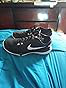

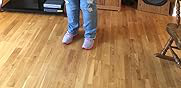

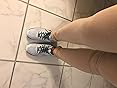

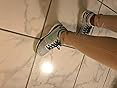

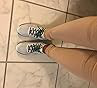

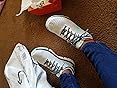

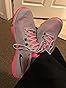

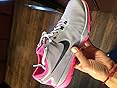

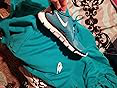

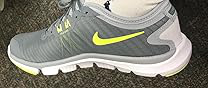

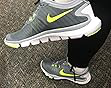

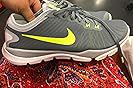

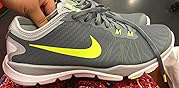

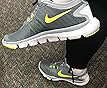

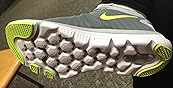

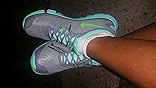

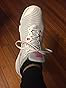

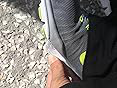

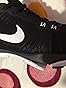

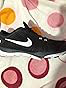

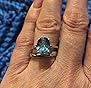

In [13]:
# get unique image links
image_links = df_5core['image'].drop_duplicates()
image_links = image_links.explode()[1:]   # the first image link is NA
print(f"There are {len(image_links)} unique image links in 5core metadata")

# check unique images urls
for url in image_links:
    print(url, flush=True)

# preview unique images available in dataset
for url in image_links:
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    display(image)

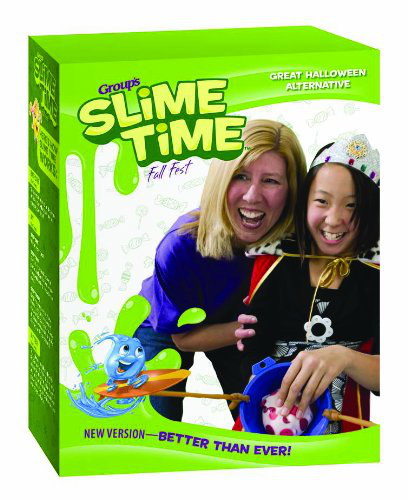

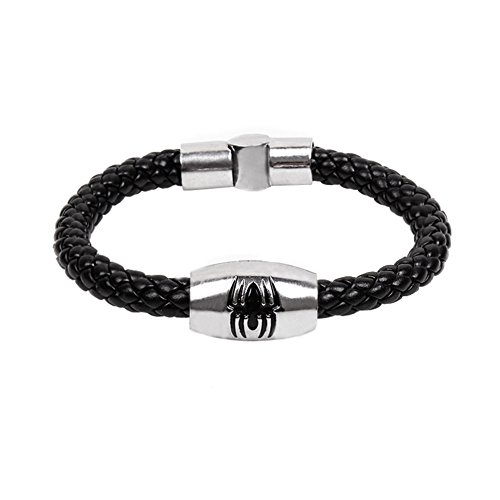

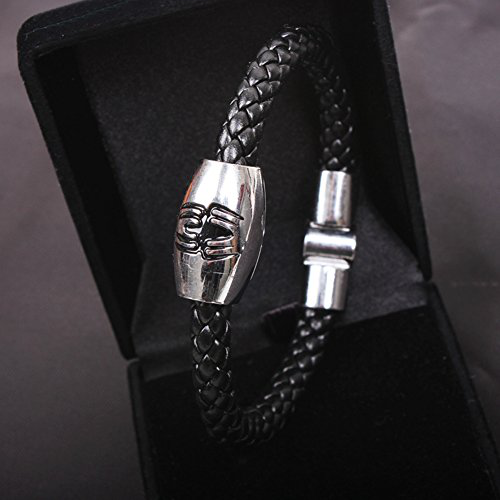

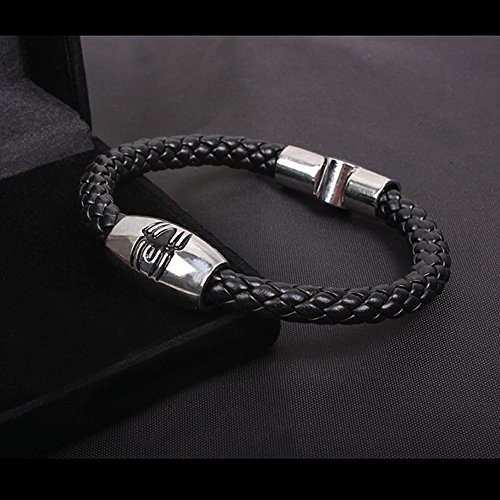

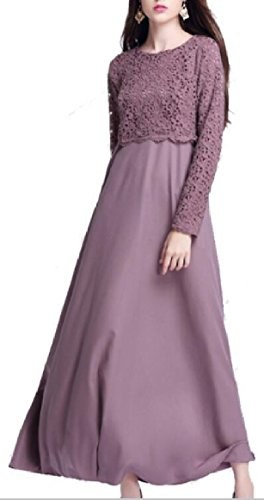

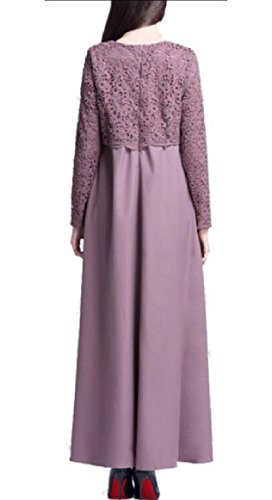

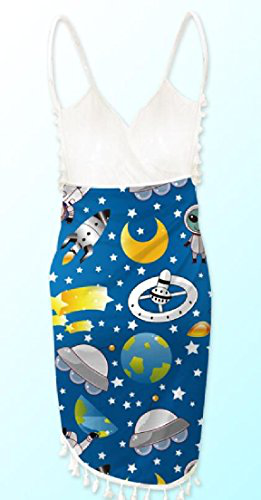

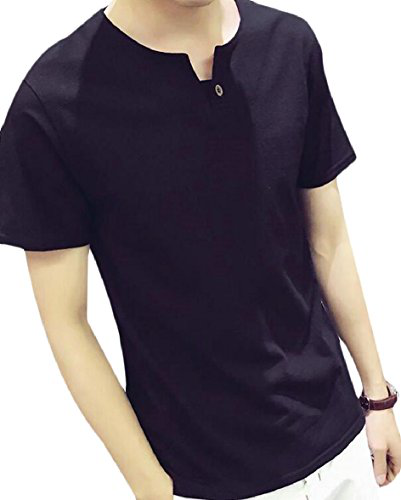

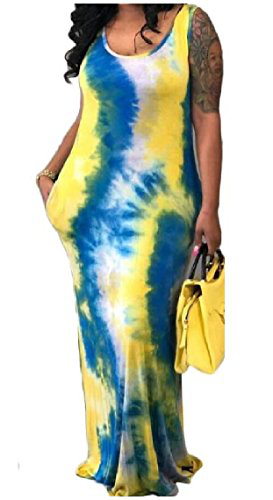

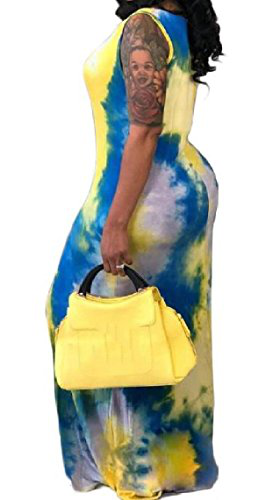

In [14]:
for url in catalogue_images['imageURLHighRes'][:10]:
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    display(image)

In [21]:
# Set display options to prevent text from being cut off
pd.set_option('display.max_colwidth', None)  # No limit on column width
catalogue_images[100:]


,asin,imageURLHighRes
42,B000073209,https://images-na.ssl-images-amazon.com/images/I/41SyGjt4KdL.jpg
42,B000073209,https://images-na.ssl-images-amazon.com/images/I/41FEcB5bw5L.jpg
42,B000073209,https://images-na.ssl-images-amazon.com/images/I/516JbzHiIAL.jpg
42,B000073209,https://images-na.ssl-images-amazon.com/images/I/51hHfVflNsL.jpg
43,B0000732EP,https://images-na.ssl-images-amazon.com/images/I/41EFWJXZ26L.jpg
...,...,...
186635,B01HJHTH5U,https://images-na.ssl-images-amazon.com/images/I/41UsykdVCQL.jpg
186635,B01HJHTH5U,https://images-na.ssl-images-amazon.com/images/I/51dMXZ%2B2ZVL.jpg
186635,B01HJHTH5U,https://images-na.ssl-images-amazon.com/images/I/41dicQiHMOL.jpg
186635,B01HJHTH5U,https://images-na.ssl-images-amazon.com/images/I/516wjTOoS%2BL.jpg
